In [ ]:
!nvidia-smi

Tue Jul  9 11:19:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

导入资料

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
x = data["YearsExperience"]
y = data["Salary"]


下载中文字体

In [ ]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=fc441aa31c102ced09463df0ec1b281fcd2d36a655952e5aecd3800f60135a4e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

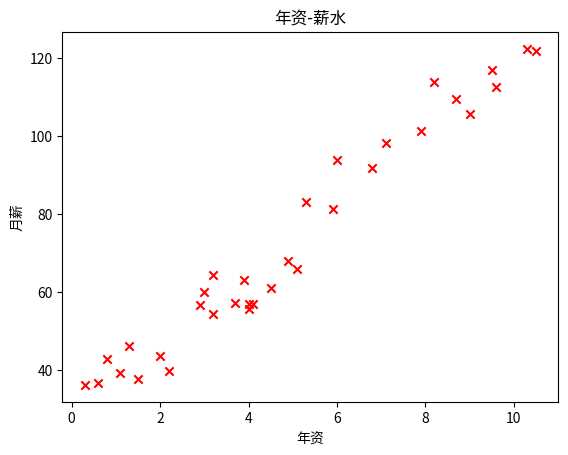

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")
plt.scatter(x, y, marker='x', color='red')
plt.title("年资-薪水")
plt.xlabel("年资")
plt.ylabel("月薪")
plt.show()


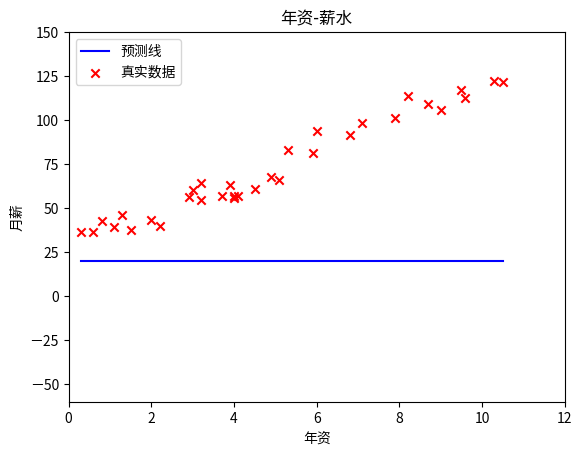

In [ ]:
w, b = 0, 0

def plot_pred(w, b):
  y_pred = x*w + b
  plt.plot(x, y_pred, color="blue", label="预测线")
  plt.scatter(x, y, marker='x', color='red', label="真实数据")
  plt.title("年资-薪水")
  plt.xlabel("年资")
  plt.ylabel("月薪")
  plt.xlim([0, 12]) #固定x轴的值
  plt.ylim([-60,150])
  plt.legend() #显示资料名称
  plt.show()

plot_pred(0,20)

动态调整w和b的值

In [ ]:
from ipywidgets import interact
interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

In [ ]:
'''
cost function
为每一条直线与资料的匹配程度评分
方法：计算每个点与直线的距离加总
注意：每一个距离的资料要平方
'''
import pandas as pd
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
x = data["YearsExperience"]
y = data["Salary"]

def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)
  return cost

compute_cost(x, y, 10, 0)


602.547878787879

In [ ]:
# b = 0 w=-100~100 cost会是多少
costs = []
for w in range(-100, 101):
  cost = compute_cost(x, y, w, 0)
  costs.append(cost)


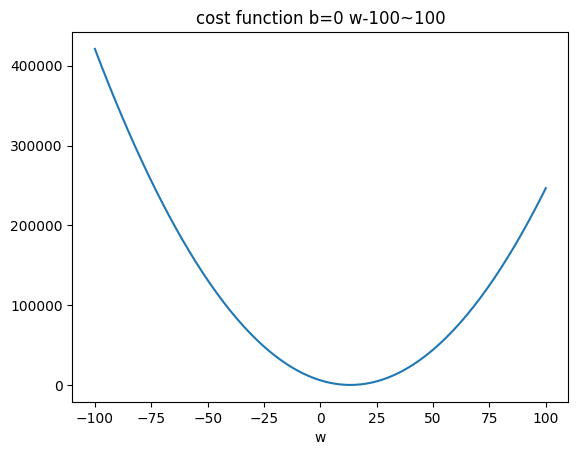

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(-100,101), costs)
plt.title("cost function b=0 w-100~100")
plt.xlabel("w")
plt.show()

In [ ]:
import numpy as np

ws = np.arange(-100,101)
bs = np.arange(-100, 101)
costs = np.zeros((201,201))


for i,w in enumerate(ws):
  for j,b in enumerate(bs):
    cost=compute_cost(x, y, w, b)
    costs[i,j] = cost
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

当w=[9], b=[29]时会有最小的cost32.6948484848485


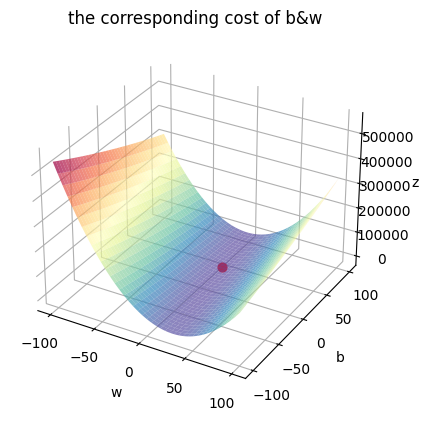

In [ ]:
ax = plt.axes(projection="3d")

#设置背景颜色
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))
# 将bs和ws两个一维矩阵转换成二维网格
b_grid, w_grid = np.meshgrid(bs, ws)

ax.set_title("the corresponding cost of b&w")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("z")
ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)

min_cost = np.min(costs)
#找到最低cost对应的w和b
w_index, b_index = np.where(costs == np.min(costs))
print(f"当w={ws[w_index]}, b={bs[b_index]}时会有最小的cost{min_cost}")
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
plt.show()

### 更有效率地寻找w和b——梯度下降

梯度下降：根据斜率改变参数的值

In [ ]:
"""
随机找一个点，并通过微分的方法找出该点的切线的斜率，并根据斜率改变w
现在有cost function：(y-wx)^2,微分后斜率就是-2x(y-wx),
最后将w-斜率*学习率
学习率：梯度下降时的步伐大小
如果学习率设置不当很可能会导致永远无法抵达最低点

现在有一个cost function:(真实数据-预测值)^2，亦即(y-y_pred)^2，即(y-(wx+b))^2,
如果对w微分就会得到w方向的斜率2x(wx+b-y),对b微分就会得到b方向斜率2(wx+b-y)
"""

In [ ]:
#记得导入资料
def compute_gradient(x, y, w, b):
  w_gradient = (x*(w*x+b-y)).mean()
  b_gradient = ((w*x+b-y)).mean()
  return w_gradient, b_gradient

compute_gradient(x, y, 20, 10)


(268.54757575757577, 35.084848484848486)

In [ ]:
w = 0
b = 0
learning_rate = 0.001

def gradient_descent(x,y,w_init,b_init,learning_rate,cost_function,gradient_function,run_iter,p_iter=1000):
  c_hist, w_hist, b_hist = [], [], []
  w = w_init
  b = b_init
  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x,y,w,b)
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x,y,w,b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)
    if i%p_iter == 0:
      print(f"Iteration {i:5}: Cost{cost:.2e}, w:{w:.2e}, b:{b:.2e}, w_gradient:{w_gradient: .2e}, b_gradient:{b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [ ]:
w_init = -100
b_init = -100
leanring_rate = 1.0e-3
run_iter = 20000
w_final,b_final,w_hist,b_hist,c_hist = gradient_descent(x,y,w_init,b_init,learning_rate,compute_cost,compute_gradient,run_iter)

Iteration     0: Cost5.08e+05, w:-9.58e+01, b:-9.93e+01, w_gradient:-4.20e+03, b_gradient:-6.61e+02
Iteration  1000: Cost1.94e+03, w:2.17e+01, b:-5.56e+01, w_gradient: 3.35e+00, b_gradient:-2.23e+01
Iteration  2000: Cost1.15e+03, w:1.87e+01, b:-3.60e+01, w_gradient: 2.57e+00, b_gradient:-1.71e+01
Iteration  3000: Cost6.88e+02, w:1.65e+01, b:-2.10e+01, w_gradient: 1.96e+00, b_gradient:-1.31e+01
Iteration  4000: Cost4.17e+02, w:1.48e+01, b:-9.51e+00, w_gradient: 1.50e+00, b_gradient:-1.00e+01
Iteration  5000: Cost2.58e+02, w:1.34e+01, b:-7.18e-01, w_gradient: 1.15e+00, b_gradient:-7.67e+00
Iteration  6000: Cost1.64e+02, w:1.24e+01, b:6.01e+00, w_gradient: 8.82e-01, b_gradient:-5.87e+00
Iteration  7000: Cost1.10e+02, w:1.17e+01, b:1.12e+01, w_gradient: 6.75e-01, b_gradient:-4.50e+00
Iteration  8000: Cost7.78e+01, w:1.11e+01, b:1.51e+01, w_gradient: 5.17e-01, b_gradient:-3.44e+00
Iteration  9000: Cost5.90e+01, w:1.06e+01, b:1.81e+01, w_gradient: 3.96e-01, b_gradient:-2.64e+00
Iteration 100

In [ ]:
print(f"最终的w&b=({w_final:.2f},{b_final:.2f})")

最终的w&b=(9.14,27.89)


### 接下来就可以用计算出的w和b计算薪水了！！

##### 画些图来看看成果，嘻嘻~~

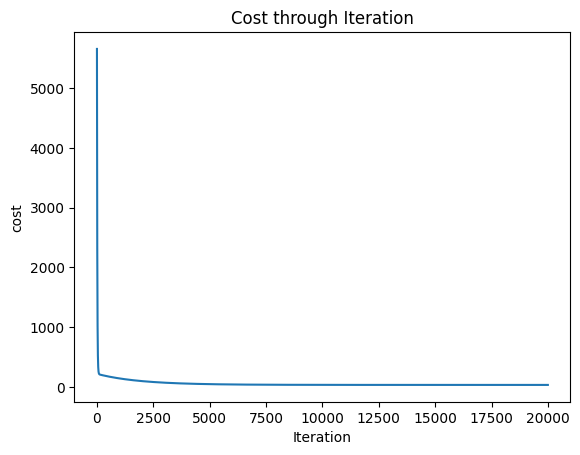

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,20000),c_hist)
plt.title("Cost through Iteration")
plt.xlabel("Iteration")
plt.ylabel("cost")
plt.show()

In [ ]:
import numpy as np

ws = np.arange(-100,101)
bs = np.arange(-100, 101)
costs = np.zeros((201,201))


for i,w in enumerate(ws):
  for j,b in enumerate(bs):
    cost=compute_cost(x, y, w, b)
    costs[i,j] = cost

当w=[9], b=[29]时会有最小的cost32.6948484848485


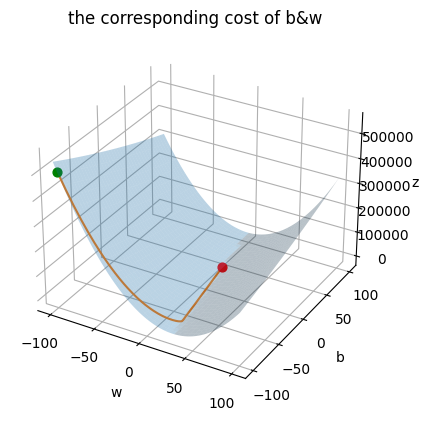

In [ ]:
ax = plt.axes(projection="3d")

#设置背景颜色
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))
# 将bs和ws两个一维矩阵转换成二维网格
b_grid, w_grid = np.meshgrid(bs, ws)

ax.set_title("the corresponding cost of b&w")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("z")
ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)

min_cost = np.min(costs)
#找到最低cost对应的w和b
w_index, b_index = np.where(costs == np.min(costs))
print(f"当w={ws[w_index]}, b={bs[b_index]}时会有最小的cost{min_cost}")
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
ax.plot(w_hist, b_hist, c_hist)
plt.show()

In [ ]:
"""
机器学习过程：
1. 准备数据
2. 设定一个模型
3. 设定cost function(也就是loss function)
4. 设定optimizer(如gradient descent)
"""

# 多元线性回归

形式：y = w1*x1+w2*x2+w3*x3+...+b
多元线性回归能够使模型考虑更多的变量。以上一个模型为例，它只能够考虑工龄，而多元线性回归可以考虑更多的变量如学历、城市等，使得模型预测结果更为准确客观

### 数据正规化
有很多的数据都并非数值，因此要对其做正规化的操作
有些變量有明確的高低關係，比如說學歷，這個時候就可以用label encoding,直接為不同的學歷賦一個有大小關係的值(如0,1,2等)
有的變量沒有明確的大小關係，比如說所在城市，這個時候就可以用one hot encoding,把城市這個變量分成三個，所在城市賦“1”，其餘皆為0

In [78]:
import pandas as pd
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data2.csv"
data = pd.read_csv(url)
data

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7
5,1.2,碩士以上,城市C,60.8
6,8.6,大學,城市C,50.1
7,6.9,碩士以上,城市A,70.3
8,4.2,大學,城市A,40.7
9,2.4,高中以下,城市A,28.1


In [79]:
# label encoding
data["EducationLevel"] = data["EducationLevel"].map({"高中以下":0,"大學":1,"碩士以上":2})
data["EducationLevel"]

0     1
1     2
2     0
3     0
4     2
5     2
6     1
7     2
8     1
9     0
10    0
11    1
12    2
13    2
14    2
15    1
16    2
17    1
18    0
19    0
20    1
21    2
22    2
23    2
24    1
25    2
26    1
27    0
28    0
29    1
30    2
31    2
32    2
33    1
34    2
35    1
Name: EducationLevel, dtype: int64

In [80]:
# one hot encoding
# 假如有城市ABC，那麼其實我們只需要知道城市AB的情況就可以推導出城市C的特征
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(data[["City"]])
city_encoded = onehot_encoder.transform(data[["City"]]).toarray()
city_encoded

array([[ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 1.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.0

In [81]:
# 把City這個特征轉換成CityA、CityB和CityC三個特征
data[["CityA", "CityB", "CityC"]] = city_encoded
# 把City這個特征刪掉
data = data.drop(["City", "CityC"], axis=1) #axis=1指的是要刪掉的東西是縱列
data

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


In [82]:
data

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


# 資料與處理——訓練集、測試集(8:2)

In [83]:
from sklearn.model_selection import train_test_split
x = data[["YearsExperience","EducationLevel","CityA","CityB"]]
y = data[["Salary"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #test_size就是測試集的大小
x_train, x_test = x_train.to_numpy(), x_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()
x_train, x_test

(array([[ 3.60e+00,  1.00e+00,  1.00e+00,  0.00e+00],
        [ 3.90e+00,  1.00e+00,  1.00e+00,  0.00e+00],
        [ 4.80e+00,  1.00e+00,  1.00e+00,  0.00e+00],
        [ 2.10e+00,  0.00e+00,  1.00e+00,  0.00e+00],
        [ 8.20e+00,  1.00e+00,  0.00e+00,  0.00e+00],
        [ 6.90e+00,  2.00e+00,  1.00e+00,  0.00e+00],
        [ 1.50e+00,  2.00e+00,  0.00e+00,  0.00e+00],
        [ 7.80e+00,  2.00e+00,  0.00e+00,  0.00e+00],
        [ 1.00e+01,  2.00e+00,  0.00e+00,  1.00e+00],
        [ 6.10e+00,  2.00e+00,  1.00e+00,  0.00e+00],
        [ 8.00e+00,  1.00e+00,  0.00e+00,  0.00e+00],
        [ 6.50e+00,  2.00e+00,  1.00e+00,  0.00e+00],
        [ 1.70e+00,  2.00e+00,  0.00e+00,  0.00e+00],
        [ 4.60e+00,  1.00e+00,  1.00e+00,  0.00e+00],
        [ 8.40e+00,  1.00e+00,  0.00e+00,  0.00e+00],
        [ 5.30e+00,  0.00e+00,  1.00e+00,  0.00e+00],
        [ 4.30e+00,  1.00e+00,  1.00e+00,  0.00e+00],
        [ 2.50e+00,  0.00e+00,  1.00e+00,  0.00e+00],
        [ 1.20e+00,  2.00e+0

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [85]:
import numpy as np
w = np.array([1,2,3,4]) # YearsExperience, EducationLevel, CityA, CityB
b = 0
y_pred = (x_train*w).sum(axis=1) + b #每個橫行做加總

In [86]:
((y_train - y_pred)**2).mean() #cost function也就是loss

3270.8744276144694

In [87]:
def compute_cost(x,y,w,b):
  y_pred = (x*w).sum(axis=1)+b
  cost = ((y-y_pred)**2).mean()
  return cost

In [88]:
w = np.array([1,2,3,4])
b = 0
compute_cost(x_train, y_train, w, b)

3270.8744276144694

In [89]:
#設定optimizer-gradient descent = 根據斜率改變參數
"""
(真實數據-預測值)**2
= (y - y_pred)**2
= (y-(w1*x1+w2*x2+w3*x3+w4*x4+b))**2
w1方向斜率=x1(y_pred-y)
w2方向斜率=x2(y_pred-y)
w3方向斜率=x3(y_pred-y)
w4方向斜率=x4(y_pred-y)
b方向斜率(y_pred-y)
然後設定learning rate，之後跟之前一樣
"""
y_pred = (x_train*w).sum(axis=1)+b
b_gradient = (y_pred-y_train).mean()
w_gradient = np.zeros(x_train.shape[1])
for i in range(x_train.shape[1]):
  w_gradient[i] = (x_train[:,i]*(y_pred-y_train)).mean()
w_gradient, b_gradient

(array([ 2.71e+00,  2.05e+00, -1.48e-01,  4.19e+00]), -54.332142857142856)

In [90]:
def compute_gradient(x,y,w,b):
  y_pred = (x*w).sum(axis=1)+b
  w_gradient = np.zeros(x.shape[1])
  b_gradient = (y_pred-y).mean()
  for i in range(x.shape[1]):
    w_gradient[i] = (x[:,i]*(y_pred-y_train)).mean()
  return w_gradient, b_gradient

In [91]:
compute_gradient(x_train,y_train,w,b)

(array([ 2.71e+00,  2.05e+00, -1.48e-01,  4.19e+00]), -54.332142857142856)

In [92]:
np.set_printoptions(formatter={'float':'{: .2e}'.format})
def gradient_descent(x,y,w_init,b_init,learning_rate,cost_function,gradient_function,run_iter,p_iter=1000):
  c_hist, w_hist, b_hist = [], [], []
  w = w_init
  b = b_init
  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x,y,w,b)
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x,y,w,b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)
    if i%p_iter == 0:
      print(f"Iteration {i:5}: Cost{cost:.2e}, w:{w}, b:{b:.2e}, w_gradient:{w_gradient}, b_gradient:{b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [98]:
w_init = np.array([1,2,2,4])
b_init = 0
leanring_rate = 1.0e-3
run_iter = 40000
w_final,b_final,w_hist,b_hist,c_hist = gradient_descent(x_train,y_train,w_init,b_init,learning_rate,compute_cost,compute_gradient,run_iter)

Iteration     0: Cost3.27e+03, w:[ 9.97e-01  2.00e+00  2.00e+00  4.00e+00], b:5.43e-02, w_gradient:[ 3.18e+00  2.64e+00 -1.15e+00  4.57e+00], b_gradient:-5.43e+01
Iteration  1000: Cost6.98e+02, w:[-2.17e-01  9.06e-01  1.77e+00  1.64e+00], b:3.44e+01, w_gradient:[ 2.67e-01  3.98e-01  7.20e-01  1.17e+00], b_gradient:-2.00e+01
Iteration  2000: Cost3.51e+02, w:[-2.73e-01  6.36e-01  1.12e+00  8.68e-01], b:4.70e+01, w_gradient:[-4.69e-02  2.08e-01  5.43e-01  5.11e-01], b_gradient:-7.35e+00
Iteration  3000: Cost3.03e+02, w:[-2.07e-01  4.53e-01  6.88e-01  4.92e-01], b:5.16e+01, w_gradient:[-7.18e-02  1.61e-01  3.32e-01  2.72e-01], b_gradient:-2.70e+00
Iteration  4000: Cost2.97e+02, w:[-1.41e-01  3.13e-01  4.27e-01  2.86e-01], b:5.33e+01, w_gradient:[-5.82e-02  1.20e-01  2.01e-01  1.53e-01], b_gradient:-9.93e-01
Iteration  5000: Cost2.96e+02, w:[-9.13e-02  2.11e-01  2.68e-01  1.68e-01], b:5.40e+01, w_gradient:[-4.12e-02  8.48e-02  1.23e-01  8.85e-02], b_gradient:-3.65e-01
Iteration  6000: Cost2

In [99]:
w_final, b_final

(array([ 2.42e-07,  2.07e-07,  2.49e-07, -1.91e-07]), 54.33214285713931)

In [100]:
import pandas as pd

y_pred = (w_final*x_test).sum(axis=1)+b_final

pd.DataFrame({
    "y_pred":y_pred,
    "y_test":y_test[:,0]
})

,y_pred,y_test
0,54.332143,43.8
1,54.332143,45.9
2,54.332143,25.2
3,54.332143,58.0
4,54.332143,40.7
5,54.332143,68.4
6,54.332143,28.1
7,54.332143,29.7


In [97]:
"""
套用到真實情況
5.3 碩士以上 城市A
"""
x_real = np.array([[5.3,2,1,0],[7.2,0,0,1]])
x_real = scaler.transform(x_real)
y_real = (w_final*x_real).sum(axis=1)+b_final
y_real

array([ 5.43e+01,  5.43e+01])

# 邏輯回歸